# Using `astropy.cosmology`

In this tutorial, we will briefly cover some of the things the `astropy.cosmology` package can do.

You may find it helpful to keep [the Astropy documentation for the cosmology package](http://docs.astropy.org/en/stable/cosmology/index.html) open along side this tutorial for reference/additional reading.

In [1]:
from astropy import units as u

The core objects in `astropy.cosmology` are representations of various cosmologies.  Astropy comes with some standard ones (primarily for LCDM) built-in, and in many practical cases that's all you're going to care about

In [2]:
from astropy.cosmology import WMAP9, Planck13

In [3]:
WMAP9

FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=0.0463)

In [4]:
Planck13

FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[ 0.    0.    0.06] eV, Ob0=0.0483)

These objects store the relevant information needed to reconstruct the cosmology:

In [5]:
WMAP9.H0  # Hubble's Constant

<Quantity 69.32 km / (Mpc s)>

In [6]:
Planck13.H0  # Hubble's Constant

<Quantity 67.77 km / (Mpc s)>

In [7]:
WMAP9.Ob0, Planck13.Ob0 #baryon fraction at z=0

(0.04628, 0.048252)

In [8]:
WMAP9.Om0, Planck13.Om0  #matter fraction at z=0

(0.2865, 0.30712)

In [9]:
WMAP9.Ode0, Planck13.Ode0  #dark energy at z=0

(0.713413074939123, 0.69139125339322915)

In [10]:
WMAP9.Ok0, Planck13.Ok0 #curvature... should be zero for flat universes

(0.0, 0.0)

This information is then *used* by the objects in various methods on them that can be used to determine useful quantities about the universe in that cosmology at an arbitrary redshift:

In [11]:
WMAP9.H(1)  #Hubble parameter at z=1

<Quantity 120.20183696225173 km / (Mpc s)>

In [12]:
WMAP9.lookback_time(2) # lookback time out to z=2

<Quantity 10.442114507072844 Gyr>

*Reversing* this procedure to get the redshift of a particular cosmological quantity turns out to be less straightforward for most cosmologies, but it can be done with the `z_at_value` function:

In [13]:
from astropy.cosmology import z_at_value

z_at_value(WMAP9.comoving_distance, 100*u.Mpc)

0.023239379646018528

`astropy.cosmology` is capable of more complex functionality.  E.g., working with [more complex forms of dark energy](http://docs.astropy.org/en/stable/cosmology/index.html#specifying-a-dark-energy-model) and [including massive neutrinos](http://docs.astropy.org/en/stable/cosmology/index.html#photons-and-neutrinos).  It is also written in such a way that implementing *other* cosmologies with different properties are possible while still retaining the interface and tools described above. That is beyond the scope of this tutorial, though, so if you are interested you can consult the [cosmology documentation](http://docs.astropy.org/en/stable/cosmology/index.html), or more domain-specific [affiliated packages](http://www.astropy.org/affiliated/).

## Exercise

Determine the luminosity distance to some reasonably-high redshift object using both the WMAP9 cosmology and Planck 2013.  How different are they?  Should you care?

In [14]:
Planck13.luminosity_distance(1.5)

<Quantity 11195.81103909226 Mpc>

In [15]:
WMAP9.luminosity_distance(1.5)

<Quantity 11129.368906038348 Mpc>

In [16]:
ddist = Planck13.luminosity_distance(1.5) - WMAP9.luminosity_distance(1.5)
ddist, ddist/WMAP9.luminosity_distance(1.5)

(<Quantity 66.44213305391168 Mpc>, <Quantity 0.0059699820910656355>)

A 0.5% effect. probably don't care for most astronomy problems, but we are in the "precision cosmology" era...


# Make a plot with both redshift and universe age axes using `astropy.cosmology`

This is a more complex tutorial (based on a similar tutorial from http://tutorials.astropy.org) that illustrates a specific effect using `astropy.cosmology` and provides tips on how to make a nice-looking plot using `matplotlib`.

Each redshift corresponds to an age of the universe, so if you're plotting some quantity against redshift, it's often useful show the universe age too.  The relationship between the two changes depending the type of cosmology you assume, which is where `astropy.cosmology` comes in. In this tutorial we'll show how to use the tools in `astropy.cosmology` to make a plot like this:

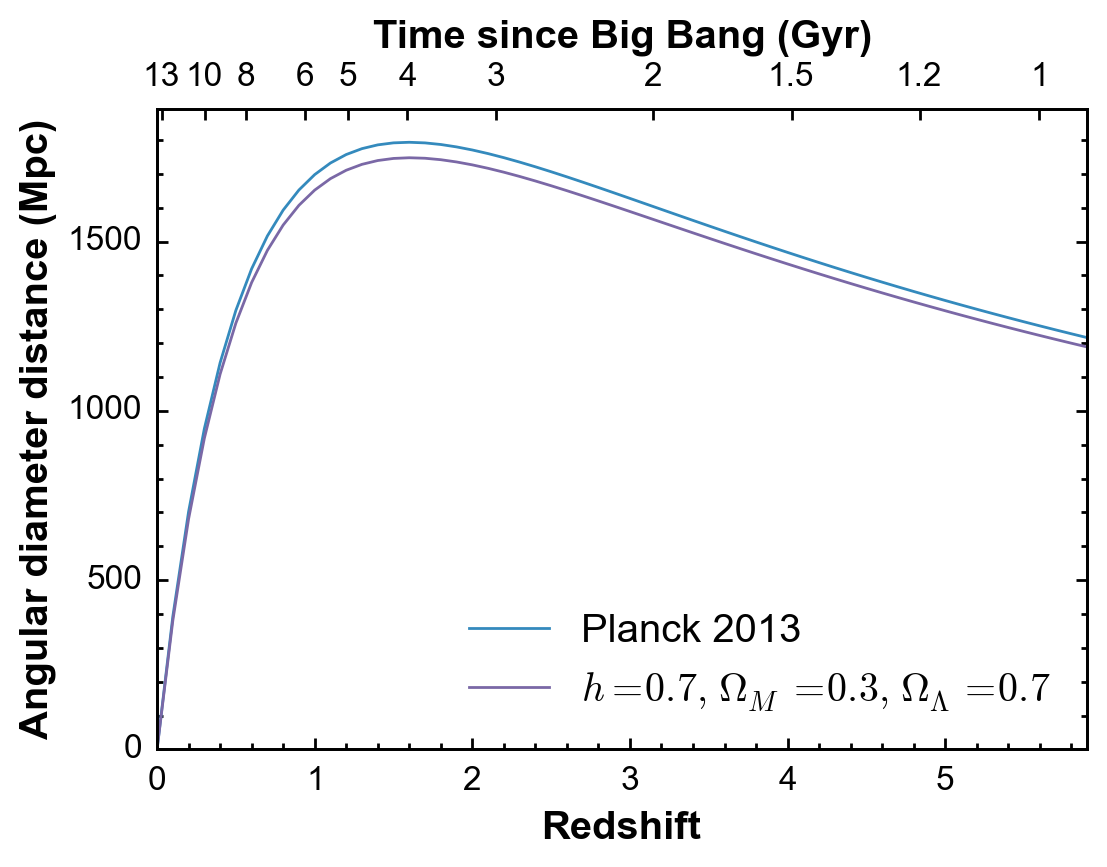

In [17]:
from IPython.display import Image
Image(filename="data/ang_dist.png", width=500)

We start with a cosmology object. We will make a flat cosmology (which means that the curvature density $\Omega_k=0$)  with a hubble parameter of $70$ km/s/Mpc and matter density $\Omega_M=0.3$ at redshift 0. The `FlatLambdaCDM` cosmology then automatically infers that the dark energy density $\Omega_\Lambda$ must $=0.7$, because $\Omega_M + \Omega_\Lambda + \Omega_k = 1$. 

In [18]:
from astropy.cosmology import FlatLambdaCDM

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# You can also pass an astropy `Quantity` with the units specified. 

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

Note that we could instead use one of the built-in cosmologies, like `WMAP9` or `Planck13`, in which case we would just redefine the `cosmo` variable.

Now we need an example quantity to plot versus redshift. Let's use the angular diameter distance, which is the physical transverse distance (the size of a galaxy, say) corresponding to a fixed angular separation on the sky. To calculate the angular diameter distance for a range of redshifts:

In [19]:
import numpy as np
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

Note that we passed an array of redshifts to `cosmo.angular_diameter_distance` and it produced a corresponding array of distance values, one for each redshift. Let's plot them:

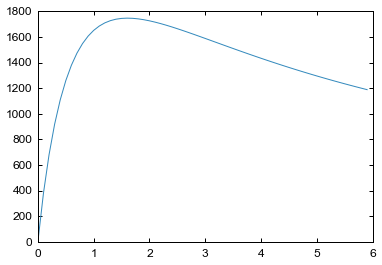

In [20]:
import matplotlib.pyplot as plt

# Set up matplotlib to use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("data/cosmology_plot_matplotlibrc")
plt.rc('xtick.major', size=4)
plt.rc('ytick.major', size=4)
plt.rc('xtick.minor', size=2)
plt.rc('ytick.minor', size=2)
plt.rc('axes', grid=False)
plt.rc('xtick.major', width=1)
plt.rc('xtick.minor', width=1)
plt.rc('ytick.major', width=1)
plt.rc('ytick.minor', width=1)

%matplotlib inline

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist);

To check the units of the angular diameter distance, take a look at the unit attribute:

In [21]:
dist.unit

Unit("Mpc")

Now let's put some age labels on the top axis. We're going to pick a series of round age values where we want to place axis ticks. You may need to tweak these depending on your redshift range to get nice, evenly spaced ticks.

In [22]:
import astropy.units as u
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

To link the redshift and age axes, we have to find the redshift corresponding to each age. The function `z_at_value` does this for us.

In [23]:
from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

Now we make the second axes, and set the tick positions using these values.

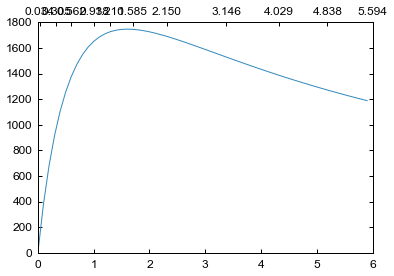

In [24]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks);

We have ticks on the top axis at the correct ages, but they're labelled with the redshift, not the age. Fix this by setting the tick labels by hand. 

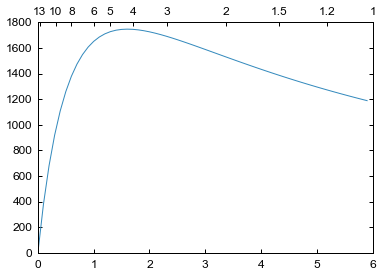

In [25]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value]);

We need to make sure the top and bottom axes have the same redshift limits. They may not line up properly in the above plot, for example, depending on your setup (the age of the universe should be ~13 Gyr at z=0). 

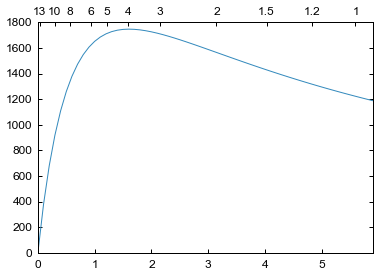

In [26]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax);

We're almost done. We just need to label all the axes, and add some minor ticks. Let's also tweak the y axis limits to avoid putting labels right near the top of the plot.

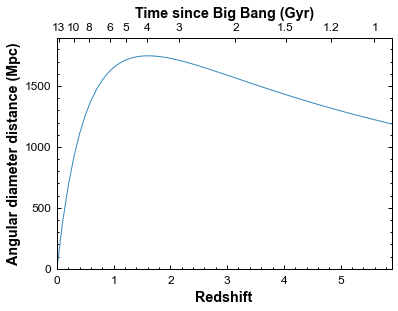

In [27]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist)
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.set_ylim(0, 1890)
ax.minorticks_on()

Now for comparison, let's add the angular diameter distance for a different cosmology, from the Planck 2013 results. And then finally, we save the figure to a png file.

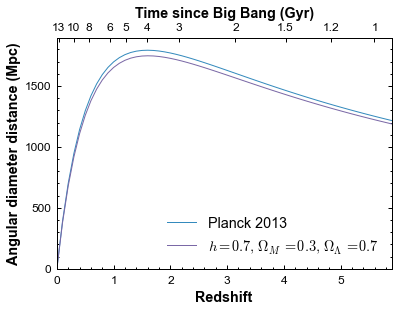

In [28]:
from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.minorticks_on()
ax.set_ylim(0, 1890)
fig.savefig('data/ang_dist.png', dpi=200, bbox_inches='tight')

`bbox_inches='tight'` automatically trims any whitespace from around the plot edges. 

And we're done!

## Exercise

Well, almost done.  Notice that we calculated the times on the upper axis using the original cosmology, not the new cosmology based on the Planck 2013 results. So strictly speaking, this axis applies only to the original cosmology, although the difference between the two is small. As an advanced exercise, you can try plot two different upper axes, slightly offset from each other, to show the times corresponding to each cosmology. Take a look at the first answer to [this question on Stack Overflow](http://stackoverflow.com/questions/7733693/matplotlib-overlay-plots-with-different-scales) for some hints on how to go about this.